<a href="https://colab.research.google.com/github/Ashwitha2305/Stock-Market-Prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Columns: Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  
Model Parameters (theta): [ 5.31103727e-03 -5.25417479e-01  7.05620967e-01  8.21621131e-01
 -1.61550575e-09]

Mean Squared Error: 3.0700
R² Score: 0.9996


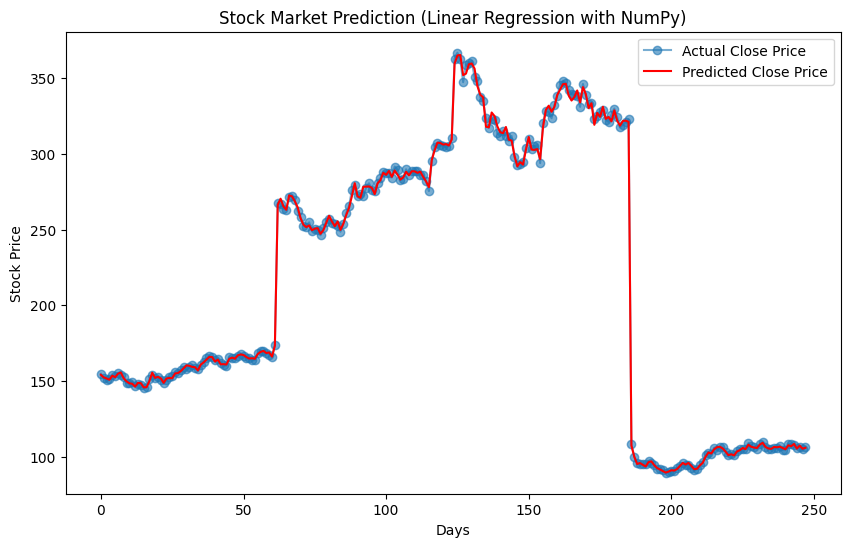

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("/content/stocks.csv")
print("Dataset Columns:", df.columns)
print(df.head())

# Step 2: Select features and target
# Adjust column names if needed (check your CSV)
X = df[["Open", "High", "Low", "Volume"]].values
y = df["Close"].values.reshape(-1, 1)

# Step 3: Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Step 4: Train Linear Regression (Normal Equation)
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Model Parameters (theta):", theta.flatten())

# Step 5: Predictions
y_pred = X_b @ theta

# Step 6: Evaluation Metrics
mse = np.mean((y - y_pred) ** 2)
r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 7: Visualization (Actual vs Predicted Closing Prices)
plt.figure(figsize=(10,6))
plt.plot(y, label="Actual Close Price", marker="o", alpha=0.6)
plt.plot(y_pred, label="Predicted Close Price", color="red")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Stock Market Prediction (Linear Regression with NumPy)")
plt.legend()
plt.show()

